In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

if code_dir_name not in str(Path.cwd()).split('/')[-1]:
    for _ in range(5):

        parent_path = str(Path.cwd().parents[_]).split('/')[-1]

        if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

            code_dir = str(Path.cwd().parents[_])

            if code_dir is not None:
                break
else:
    code_dir = str(Path.cwd())
sys.path.append(code_dir)

# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

# Analysis plan:

1. ## [Descriptives and tables](./1.%20descriptives_and_tables.ipynb)
2. ## [Visualization](./2.%20visualization.ipynb)
3. ## [Frequencies and Normality tests](./2.%20frequencies_and_normality_test.ipynb)
   1. ### Frequencies, histograms, and QQ plots
      * Normal test
      * Kurtosis test
      * Shapiro
      * Anderson
      * Bartlett
   2. ### Correlation between independent variables (IVs) and control variables and Multicolinarity test
      * Pearson's R
      * VIF
     - ***ivs_dummy*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
     - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
     - ***% Sector per Workforce*** (continous ratio) = Sector percentage per worksforce (0-100)
     - ***num_words*** (continous ratio) = Number of words in job description
     - ***English Requirement in Job Ad*** (binary nominal) = English requirement in job description (0 vs. 1)
     - ***Dutch Requirement in Job Ad*** (binary nominal) = Dutch requirement in job description (0 vs. 1)
     - ***Platform*** (binary dummy) = LinkedIn (0 vs. 1), Indeed (0 vs. 1), Glassdoor (0 vs. 1)

4. ## [ANOVA and Chi-square (Pearson's R)](./3.%20chisqt_and_anova.ipynb)

   1. ### Chi-square
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)

   2. ### One-way ANOVA, interactions, and post-hoc test
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
          - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
          - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test
      * **df_jobs:**
         - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
         - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
           - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
           - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test

5. ## [Regression Analysis](./3.%20regression_analysis.ipynb)
   1. ### Logistic Regression  with all interaction (smf):
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   3. ### Multilevel OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)

6. ## [Specification Curve Analysis](./4.%20specification_curve_analysis.ipynb)

   1. ### Logistic Specification Curve Analysis:
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Specification Curve Analysis:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)


# READ DATA

In [3]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')
df_manual = categorize_df_gender_age(df_manual)


Dataframe loaded with shape: (5947, 75)


In [4]:
with open(f'{data_dir}df_jobs_for_analysis_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_jobs)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')
df_jobs = categorize_df_gender_age(df_jobs)


Dataframe loaded with shape: (308583, 101)


## Set dataframes

#### Set variables

In [5]:
# Dataframes dict
dataframes = {
    'df_jobs': df_jobs,
    # 'df_manual': df_manual,
}

# Models dict
sm_models = {
    'OLS': sm.OLS,
    # 'Logistic': sm.Logit,
}

# DVs dict for analysis
dvs_for_analysis = {
    'probability': ['Probability Warmth and Competence', dvs_prob],
    # 'binary': ['Categorical Warmth and Competence', dvs],
    # 'binary and probability': ['Categorical and Probability Warmth and Competence', dvs_all],
}

# Make extra IV dicts
ivs_dummy_for_analysis = ivs_dummy#[iv for iv in ivs_dummy if 'Mixed' not in iv]
ivs_dummy_and_perc_for_analysis = ivs_dummy_and_perc#[iv for iv in ivs_dummy_and_perc if 'Mixed' not in iv]
ivs_dummy_perc_and_perc_interactions_for_analysis = ivs_dummy_perc_and_perc_interactions#[iv for iv in ivs_dummy_perc_and_perc_interactions if 'Mixed' not in iv]

# IVs dict for analysis
ivs_for_analysis = {
    'categories, percentages, and interactions': [
        'Categorical, PPS, and PPS Interactions Gender and Age',
        ivs_dummy_perc_and_perc_interactions_for_analysis
    ],
    'categories and percentages': [
        'Categorical and PPS Gender and Age',
        ivs_dummy_and_perc_for_analysis
    ],
    'percentages and interactions': [
        'PPS and PPS Interactions',
        ivs_perc_and_perc_interactions
    ],
    'categories': [
        'Categorical Gender and Age',
        ivs_dummy_for_analysis
    ],
    'percentages': [
        'PPS Gender and Age',
        ivs_perc
    ],
    'interactions': [
        'PPS Interactions',
        ivs_perc_interactions
    ],
}


In [6]:
def save_df_full_summary_excel(
    df_full_summary,
    title,
    text_to_add_list,
    file_save_path,
    sheet_name=None,
    startrow=None,
    startcol=None,
):
    if sheet_name is None:
        sheet_name = 'All'
    if startrow is None:
        startrow = 1
    if startcol is None:
        startcol = 1

    # Define last rows and cols locs
    header_range = 1
    endrow = startrow + header_range + df_full_summary.shape[0]
    endcol = startcol + df_full_summary.shape[1]

    # Remove NAs
    df_full_summary = df_full_summary.fillna('')

    # Write
    writer = pd.ExcelWriter(f'{file_save_path}.xlsx')
    df_full_summary.to_excel(writer, sheet_name=sheet_name, merge_cells=True, startrow=startrow, startcol=startcol)
    workbook  = writer.book
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column(startrow, 1, None, None, {'hidden': True}) # hide the index column

    # Title
    worksheet.merge_range(1, startcol, 1, endcol, title, workbook.add_format({'italic': True, 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'left', 'top': True, 'bottom': True, 'left': False, 'right': False}))

    # Main body
    body_max_row_idx, body_max_col_idx = df_full_summary.shape

    for c, r in tqdm_product(range(body_max_col_idx), range(body_max_row_idx)):
        row_to_write = startrow + header_range + r
        col_to_write = startcol + 1 + c # 1 is for index
        body_formats = {'num_format': '0.00', 'font_name': 'Times New Roman', 'font_size': 12, 'font_color': 'black', 'align': 'center', 'text_wrap': True, 'left': False, 'right': False}

        if r == 0:
            body_formats |= {'top': True, 'bottom': True, 'left': False, 'right': False}
            worksheet.set_column(col_to_write, col_to_write, 10)

        if r == body_max_row_idx-1:
            body_formats |= {'bottom': True}

        if c == 0:
            body_formats |= {'align': 'left'}
            worksheet.set_column(col_to_write, col_to_write, 15)

        worksheet.write(row_to_write, col_to_write, df_full_summary.iloc[r, c], workbook.add_format(body_formats))

    # Add Note
    note_format = {'italic': True, 'font_name': 'Times New Roman', 'font_size': 10, 'font_color': 'black', 'align': 'left', 'left': False, 'right': False}
    worksheet.merge_range(endrow, startcol, endrow, endcol, 'Note.', workbook.add_format(note_format))
    # Add text
    for i, text in enumerate(text_to_add_list):
        worksheet.merge_range(endrow + 1 + i , startcol, endrow + 1 + i, endcol, text, workbook.add_format(note_format))

    writer.close()


In [7]:
def make_full_report(
    results, dv, analysis_type, model_name, dvs_name, ivs_name, ivs_type, df_name,
    regression_info_dict=None, regressor_order=None, text_to_add_list=None, title=None, model_names=None
):
    '''
    Make a full report for a regression analysis.
    results: statsmodels regression results object or list of results objects
    dv: str, dependent variable name
    '''

    if regression_info_dict is None:
        # Regression info dict
        regression_info_dict = {
            'Model Name': lambda x: f'{x.model.__class__.__name__}',
            'N': lambda x: f'{int(x.nobs):d}',
            'R-squared': lambda x: f'{x.rsquared:.5f}',
            'R-squared Adj.': lambda x: f'{x.rsquared_adj:.5f}',
            'Log-Likelihood': lambda x: f'{x.llf:.5f}',
            'Pseudo R2': lambda x: f'{x.prsquared:.5f}',
            'F': lambda x: f'{x.fvalue:.5f}',
            'F (p-value)': lambda x: f'{x.f_pvalue:.5f}',
            'df_model': lambda x: f'{x.df_model:.0f}',
            'df_total': lambda x: f'{x.df_resid + x.df_model + 1:.0f}',
            'df_resid': lambda x: f'{x.df_resid:.0f}',
            'AIC': lambda x: f'{x.aic:.5f}',
            'BIC': lambda x: f'{x.bic:.5f}',
            'ICC': lambda x: f'{x.rsquared / (x.rsquared + (x.nobs - 1) * x.mse_resid):.5f}',
            'RMSE': lambda x: f'{x.mse_resid ** 0.5:.5f}',
            'RMSE (std)': lambda x: f'{x.mse_resid ** 0.5 / x.model.endog.std():.5f}',
            'Omnibus': lambda x: f'{sms.omni_normtest(x.resid).statistic:.5f}',
            'Omnibus (p-value)': lambda x: f'{sms.omni_normtest(x.resid).pvalue:.5f}',
            'Skew': lambda x: f'{sms.jarque_bera(x.resid)[-2]:.5f}',
            'Kurtosis': lambda x: f'{sms.jarque_bera(x.resid)[-1]:.5f}',
            'Jarque-Bera (JB)': lambda x: f'{sms.jarque_bera(x.resid)[0]:.5f}',
            'Jarque-Bera (p-value)': lambda x: f'{sms.jarque_bera(x.resid)[1]:.5f}',
            'Unstandardized Coefficent B (b)': lambda x: f'{x.params[0]:.5f}',
            'Standard Error (SE)': lambda x: f'{x.bse[0]:.5f}',
            'Standardized Coefficient b* (β)': lambda x: f'{x.params[0] / x.model.endog.std():.5f}',
            't': lambda x: f'{x.tvalues[0]:.5f}',
            't (p-value)': lambda x: f'{x.pvalues[0]:.5f}',
            '95% CI': lambda x: f'{x.conf_int().iloc[0, 1]:.5f} - {x.conf_int().iloc[0, 1]:.5f}',
            # 'Summary': lambda x: f'{x.summary()}',
            # 'F (p-value - FDR)': lambda x: f'{x.f_pvalue_fdr:.5f}',
            # 'F (p-value - Bonferroni)': lambda x: f'{x.f_pvalue_bonf:.5f}',
            # 't (p-value - FDR)': lambda x: f'{x.pvalues_fdr[1]:.5f}',
            # 't (p-value - Bonferroni)': lambda x: f'{x.pvalues_bonf[1]:.5f}',
        }
        if isinstance(results, list):
            results_to_check = results[0]
        else:
            results_to_check = results
        if all('const' in x for x in zip(results_to_check.params.index, results_to_check.bse.index, results_to_check.tvalues.index, results_to_check.pvalues.index)):
            regression_info_dict = regression_info_dict | {
                'Intercept': lambda x: f'{x.params["const"]:.5f}',
                'Intercept (std)': lambda x: f'{x.bse["const"]:.5f}',
                'Intercept t': lambda x: f'{x.tvalues["const"]:.5f}',
                'Intercept t (p-value)': lambda x: f'{x.pvalues["const"]:.5f}',
                'Intercept (95% CI)': lambda x: f'{x.conf_int().loc["const"][0]:.5f} - {x.conf_int().loc["const"][1]:.5f}',
            }
    if model_names is None:
        if isinstance(results, list):
            model_names = [
                f'{results_to_check.model.endog_names.split("_")[0] if "_" in results_to_check.model.endog_names else results_to_check.model.endog_names} Model {i}'
                for i in range(len(results))
            ]
            model_names[0] = model_names[0].replace('Model 0', 'Full Model')
        else:
            model_names = [
                f'{results.model.endog_names.split("_")[0] if "_" in results.model.endog_names else results.model.endog_names}'
            ]

    order_type = 'unordered' if regressor_order is None else 'ordered'
    if text_to_add_list is None:
        text_to_add_list = []
        if regressor_order is not None:
            text_to_add_list.append('Models are ordered by independent variable type.')

        else:
            text_to_add_list.append('Models are ordered by coefficient size, largest to smallest.')

    if title is None:
        title = f'{model_name} {analysis_type}: {dvs_name} x {ivs_name}'

    try:
        # Statsmodels summary_col
        full_summary = summary_col(
            results,
            stars=True,
            info_dict=regression_info_dict,
            regressor_order=regressor_order,
            float_format='%0.3f',
            model_names=model_names,
        )
        if isinstance(results, list) and len(results) > 4:
            full_summary.tables[0][full_summary.tables[0].filter(regex='Full Model').columns[0]].loc['Unstandardized Coefficent B (b)': '95% CI'] = ''

        # Add title and notes
        full_summary.add_title(title)
        text_to_add_list.extend(full_summary.extra_txt)
        for text in text_to_add_list:
            full_summary.add_text(text)
        # Save
        save_name = f'{table_save_path}{model_name} {df_name} - ALL {dv} {order_type} {analysis_type} on {ivs_type}'
        df_full_summary = pd.read_html(full_summary.as_html())[0]
        df_full_summary.to_csv(f'{save_name}.csv')
        df_full_summary.style.to_latex(f'{save_name}.tex', hrules=True)
        save_df_full_summary_excel(df_full_summary, title, text_to_add_list, save_name)

        return full_summary
    except IndexError as e:
        print(f'Making full report for {model_names[0]} due to the following error: {e}')
        return None


In [8]:
def make_masks(df_results, mask_gender_ivs=None, mask_age_ivs=None, mask_ivs=None, mask_dvs=None, masks_dict=None):

    if mask_gender_ivs is None:
        mask_gender_ivs = ['Female', 'Male', 'Gender_Mixed']
    if mask_age_ivs is None:
        mask_age_ivs = ['Older', 'Younger', 'Age_Mixed']
    if mask_ivs is None:
        mask_ivs = mask_gender_ivs + mask_age_ivs
    if mask_dvs is None:
        mask_dvs = dvs
    if masks_dict is None:
        masks_dict = {}

    # Warmth and Competence masks
    for mask_dv in mask_dvs:
        masks_dict[f'{mask_dv.lower()}_mask'] = df_results['Specification'].apply(
            lambda x: any(mask_dv in item for item in x if item in x)
            # HACK
            # & any('Interaction' not in item for item in x if item in x)
        )

    # Gender and Age masks
    for mask_iv in mask_ivs:
        masks_dict[f'{mask_iv.lower()}_mask'] = df_results['Specification'].apply(
            lambda x: any(mask_iv in item for item in x if item in x)
            # HACK
            # & any('Interaction' not in item for item in x if item in x)
        )

    # IV and DV masks
    for mask_iv, mask_dv in tqdm_product(mask_ivs, mask_dvs):
        masks_dict[f'{mask_iv.lower()}_{mask_dv.lower()}_mask'] = df_results['Specification'].apply(
            lambda x: any(mask_iv in item for item in x if item in x)
            & any(mask_dv in item for item in x if item in x)
            # HACK
            # & any('Interaction' not in item for item in x if item in x)
        )

    # All Gender masks
    masks_dict['gender_mask'] = pd.Series([False] * len(df_results))
    for mask_gender_iv in mask_gender_ivs:
        masks_dict['gender_mask'] |= masks_dict[f'{mask_gender_iv.lower()}_mask']

    for mask_dv in mask_dvs:
        masks_dict[f'gender_{mask_dv.lower()}_mask'] = pd.Series([False] * len(df_results))
        for mask_gender_iv in mask_gender_ivs:
            masks_dict[f'gender_{mask_dv.lower()}_mask'] |= masks_dict[f'{mask_gender_iv.lower()}_{mask_dv.lower()}_mask']

    # All Age masks
    masks_dict['age_mask'] = pd.Series([False] * len(df_results))
    for mask_age_iv in mask_age_ivs:
        masks_dict['age_mask'] |= masks_dict[f'{mask_age_iv.lower()}_mask']

    for mask_dv in mask_dvs:
        masks_dict[f'age_{mask_dv.lower()}_mask'] = pd.Series([False] * len(df_results))
        for mask_age_iv in mask_age_ivs:
            masks_dict[f'age_{mask_dv.lower()}_mask'] |= masks_dict[f'{mask_age_iv.lower()}_{mask_dv.lower()}_mask']

    # Interaction masks
    masks_dict['interactions_mask'] = df_results['Specification'].apply(
        lambda x: any('Interaction' in item for item in x)
    )
    for mask_dv in mask_dvs:
        masks_dict[f'interactions_{mask_dv.lower()}_mask'] = df_results['Specification'].apply(
            lambda x: any('Interaction' in item for item in x)
            & any(mask_dv in item for item in x)
        )

    return masks_dict


In [9]:
def get_sc_stats(
    df_results,
    dvs_,
    masks_dict,
    text_to_add_list=None,
    sc_stats_dict=None,
    alpha=None,
):
    if text_to_add_list is None:
        text_to_add_list = []
    if sc_stats_dict is None:
        sc_stats_dict = {}
    if alpha is None:
        alpha = 0.05
        # Stouffer’s Z-score and p-value for each mask
        for mask_name, mask in masks_dict.items():
            if not df_results[mask].empty and not all(df_results[mask]['coeff_pvals'] == False):
                # Share of significant effects
                significant_count = (df_results[mask]['coeff_pvals'] <= alpha).sum()
                total_count = len(df_results[mask])
                share_significant = significant_count / total_count
                null_share = 1 / total_count
                share_significant_pval = scipy.stats.binom_test(significant_count, n=total_count, p=null_share, alternative='greater')
                share_fraction = f'{significant_count}/{len(df_results[mask])}'
                # Stoutffer
                pvalues = df_results[mask]['coeff_pvals'].tolist()
                stouffer_z , stouffer_pval = scipy.stats.combine_pvalues(pvalues=pvalues, method='stouffer')

                sc_stats_dict[mask_name] = {
                    'share_significant': share_significant,
                    'share_significant_pval': share_significant_pval,
                    'stouffer_z': stouffer_z,
                    'stouffer_pval': stouffer_pval,
                }

                text_to_add_list.extend(
                    f'{"-" * 10}\n{dv.split("_Probability")[0]}:\nSign. share: {share_fraction}\np-value = {share_significant_pval:.2f}\nStouffer Z: {stouffer_z:.2f}\np-value = {stouffer_pval:.2f}'
                    for dv in dvs_
                    if mask_name.split('_mask')[0]
                    == f'{dv.split("_Probability")[0].lower()}'
                )
            else:
                sc_stats_dict[mask_name] = {
                    'share_significant': 0,
                    'share_significant_pval': 1,
                    'stouffer_z': 0,
                    'stouffer_pval': 1,
                }
            print(f'{"="*5} SCA {mask_name.split("_mask")[0].upper()} {"="*5}')
            # print(f'Length of {mask_name.split("_mask")[0]} results: {len(df_results[mask])}')
            # print(f'Number of significant p-values for {mask_name.split("_mask")[0]}: {significant_count}')
            print(f'Share of significant effects for {mask_name.split("_mask")[0]}: {share_significant:.2f} - {significant_count}/{len(df_results[mask])}')
            print(f'Share of significant effects p-value: {share_significant_pval:.2f}')
            print(f'Stoutffer Z: {stouffer_z:.2f}')
            print(f'Stoutffer p-value: {stouffer_pval:.2f}')
            print('-'*20)
            print('\n')

    return sc_stats_dict, text_to_add_list


In [10]:
def get_standardized_coefficients(results):

    # # Get standardized regression coefficients
    # std = np.asarray(constant.std(0))

    # if 'const' in results.params and 'const' in constant:
    #     std[0] = 1
    # tt = results.t_test(np.diag(std))
    # tt.c_names = results.model.exog_names

    # t-test
    std = results.model.exog.std(0)
    if 'const' in results.params:
        std[0] = 1
    tt = results.t_test(np.diag(std))
    if results.model.__class__.__name__ == 'MixedLM' or 'Group Var' in results.model.exog_names:
        offset = slice(None, -1)
        tt.c_names = results.model.exog_names[offset]
    else:
        offset = slice(None, None)
        tt.c_names = results.model.exog_names

    # Make df with standardized and unstandardized coefficients
    df_std_coef = pd.DataFrame(
        {
            'coef': results.params[offset].apply(lambda x: f'{x:.4f}'),
            'std err': results.bse[offset].apply(lambda x: f'{x:.4f}'),
            'std coef': (results.params[offset] / results.model.exog[offset].std(axis=0)).apply(lambda x: f'{x:.4f}'),
            't': results.tvalues[offset].apply(lambda x: f'{x:.4f}'),
            'P>|t|': results.pvalues[offset].apply(lambda x: f'{x:.4f}'),
            '[0.025': results.conf_int()[0][offset].apply(lambda x: f'{x:.4f}'),
            '0.975]': results.conf_int()[1][offset].apply(lambda x: f'{x:.4f}'),
        }
    )
    # if 'Group Var' in df_std_coef.index:
    #     df_std_coef = df_std_coef.drop('Group Var', axis='index')
    # # Add standardized coefficients and other data from t-test
    # df_std_coef['std coef'] = tt.effect
    # df_std_coef['std err'] = tt.sd
    # df_std_coef['t'] = tt.statistic
    # df_std_coef['P>|t|'] = tt.pvalue
    # df_std_coef['[0.025'] = tt.conf_int()[:, 0]
    # df_std_coef['0.975]'] = tt.conf_int()[:, 1]
    # df_std_coef['var'] = [names[i] for i in range(len(results.model.exog_names))]
    # df_std_coef = df_std_coef.sort_values('std coef', ascending=False)
    df_std_coef = df_std_coef.reset_index().rename(columns={'index': 'var'})
    df_std_coef = df_std_coef.rename(
        columns={
            'var': 'Variable',
            'coef': 'Unstandardized Coefficent B (b)',
            'std err': 'Standard Error',
            'std coef':'Standardized Coefficient b* (β)',
            't': 't-value',
            'P>|t|': 'p-value',
            '[0.025': '95% CI Lower',
            '0.975]': '95% CI Upper'
        }
    )
    # Reorder columns
    df_std_coef = df_std_coef[[
        'Variable',
        'Unstandardized Coefficent B (b)',
        'Standard Error',
        'Standardized Coefficient b* (β)',
        't-value',
        'p-value',
        '95% CI Lower',
        '95% CI Upper'
    ]]

    return tt, df_std_coef


In [11]:
def get_significant_predictors(df_results, top_n=None, dv_name=None, alpha=None, asc=None, enable_return=False):
    if top_n is None:
        top_n = 10
    if alpha is None:
        alpha = 0.05
    if asc is None:
        asc = False

    condition = (df_results['coeff_pvals'] < alpha) & (df_results['x_exog'] != 'const')
    if dv_name is not None:
        condition = pd.concat([condition, (df_results['y_endog'] == dv_name)])

    df_top_coeff_p = df_results.loc[condition].sort_values(by=['Coefficient'], ascending=asc)
    print('\n')
    print('+'*20)
    print('\n')
    print('-'*20)
    print(f"{top_n} {'Highest' if asc==False else 'Lowest'} significant coefficients:\n{df_top_coeff_p[['x_exog', 'y_endog', 'coeff_pvals', 'Coefficient', 'conf_int', 'pvalues']].head(top_n)}")
    print('-'*20)
    print('\n')
    print('+'*20)
    print('\n')

    if enable_return:
        return df_top_coeff_p


In [12]:
def save_dfs(row, save_name, df_to_save, df_std_coef):
    row['Results'].save(f'{save_name}.pkl')
    df_to_save.to_csv(f'{save_name}.csv')
    df_to_save.style.to_latex(f'{save_name}.tex', hrules=True)
    df_std_coef.to_csv(f'{save_name} - standardized coefficients.csv')
    df_std_coef.style.to_latex(f'{save_name} - standardized coefficients.tex', hrules=True)


# Specification Curve Analysis

In [13]:
def run_sc(df_name, df, model_name, model, dvs_type, dvs_name, dvs_, ivs_type, ivs_name, ivs_):

    # Set DVs for df_manual
    if df_name == 'df_manual':
        dvs_ = dvs

    # Run specification curve analysis
    print('\n')
    print(f'{df_name} Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs_}\nINDEPENDENT VARIABLES = {ivs_}\nCONTROLS = {controls}')
    print(f'{"="*5} {df_name} {model_name.upper()} SPECIFICATION MODE RESULTS FOR {df_name} USING {dvs_type.upper()} x {ivs_type.upper()} {"="*5}')
    print('\n')

    # Add constant
    df = sm.add_constant(df)
    constant = ivs_[:] + ['const']

    try:
        plot_title = f'{model_name}: {dvs_name} x {ivs_name}'
        sc = specy.SpecificationCurve(df=df, y_endog=dvs_, x_exog=constant, controls=controls[:1], always_include=['const'])
        sc.fit(estimator=model)
        df_results = sc.df_r

        # Compare models with controls
        controls_mask = df_results['Specification'].apply(lambda x: all(control in x for control in controls[:1]))
        df_results_controls = df_results.loc[controls_mask]

        # Warmth
        for dv in dvs_[:len(dvs_)//2]:
            warmth_results_list = [sm.OLS(endog=df[dv], exog=df[constant + controls[:1]]).fit()] + df_results_controls['Results'].loc[df_results_controls['y_endog'] == dv].tolist()
            warmth_full_summary = make_full_report(
                warmth_results_list, dv,
                dvs_name=dvs_name, ivs_name=ivs_name, ivs_type=ivs_type, df_name=df_name,
                model_name=model_name, analysis_type='specification curve'
            )
            ordered_warmth_full_summary = make_full_report(
                warmth_results_list, dv,
                dvs_name=dvs_name, ivs_name=ivs_name, ivs_type=ivs_type, df_name=df_name,
                model_name=model_name, analysis_type='specification curve', regressor_order=ivs_[:] + controls[:1]
            )
            print('\n')
            print('-'*20)
            print(f'{dv}\n')
            print('-'*20)
            print('\n')
            print(f'Warmth SUMMARY RESULTS:\n{warmth_full_summary}')
            print('\n')

        # Competence
        for dv in dvs_[len(dvs_)//2:]:
            competence_results_list = [sm.OLS(endog=df[dv], exog=df[constant + controls[:1]]).fit()] + df_results_controls['Results'].loc[df_results_controls['y_endog'] == dv].tolist()
            competence_full_summary = make_full_report(
                competence_results_list, dv,
                dvs_name=dvs_name, ivs_name=ivs_name, ivs_type=ivs_type, df_name=df_name,
                model_name=model_name, analysis_type='specification curve'
            )
            ordered_competence_full_summary = make_full_report(
                competence_results_list, dv,
                dvs_name=dvs_name, ivs_name=ivs_name, ivs_type=ivs_type, df_name=df_name,
                model_name=model_name, analysis_type='specification curve', regressor_order=ivs_[:] + controls[:1]
            )
            print('\n')
            print('-'*20)
            print(f'{dv}\n')
            print('-'*20)
            print('\n')
            print(f'Competence SUMMARY RESULTS:\n{competence_full_summary}')
            print('\n')

        # Get Specification Curve Analysis stats
        masks_dict = make_masks(df_results)
        sc_stats_dict, text_to_add_list = get_sc_stats(df_results, dvs_, masks_dict)

        # Get gender and age masks with controls for final regression reporting
        df_results_gender = df_results_controls.loc[masks_dict['gender_mask']]
        df_results_gender = df_results_gender.reset_index(drop=True)
        df_results_age = df_results_controls.loc[masks_dict['age_mask']]
        df_results_age = df_results_age.reset_index(drop=True)

        # Iterate over results and print summary
        df_std_coef_dict = {}
        for df_masked in [df_results_gender, df_results_age]:
            for idx, row in df_masked.iterrows():
                iv_name = row['x_exog']
                dv_name = row['y_endog']
                print('\n')
                print('+'*20)
                print(f'{dv_name} x {iv_name}\n')
                print('+'*20)
                print(f'{row["Results"].summary(title=plot_title)}')
                tt, df_std_coef = get_standardized_coefficients(row['Results'])
                df_std_coef_dict[f'{dv_name} x {iv_name}'] = df_std_coef
                print('+'*50)
                print('~'*20)
                print(f'STANDARDIZED BETA REGRESSION COEFFICIENTS FOR {dv_name} x {iv_name}:\n{df_std_coef}')
                if '%' not in iv_name:
                    print('-'*20)
                    print(
                        f'MEANS FOR {dv_name} x {iv_name}:\n{pg.pairwise_gameshowell(data=df, dv=dv_name, between=iv_name, effsize="eta-square").round(2)}'
                    )
                    print('-'*20)
                print('~'*20)

                # Save results to file
                save_name = f'{table_save_path}{model_name} specification curve on {ivs_type} {df_name} - {dv_name} x {iv_name} ({dvs_type} Warmth and Competence x {ivs_type} Gender and Age)'
                df_to_save = pd.DataFrame(csv.reader(row['Results'].summary(title=plot_title).as_csv().split('\n'), delimiter=','))
                try:
                    save_dfs(row, save_name, df_to_save, df_std_coef)
                except OSError:
                    save_name = f'{table_save_path}{model_name} specification curve on {ivs_type} {df_name} - {dv_name} x {iv_name} ({dvs_type} WarmComp x {ivs_type} GenAge)'
                    save_dfs(row, save_name, df_to_save, df_std_coef)

        # Get top predictors
        df_top_coeff_p = get_significant_predictors(df_results, top_n=10, enable_return=True)

        # Get bottom predictors
        get_significant_predictors(df_results, top_n=10, asc=True)

        # Plot and save
        print('\n')
        print('~'*80)
        print(f'\n{"="*5} {df_name} RESULTS FOR {plot_title} {"="*5}\n')
        print('~'*80)
        print('\n')

        for image_save_format in tqdm.tqdm(['eps', 'png', 'svg']):
            # Use following if not using forked specification_curve
            # sc.plot(preferred_spec=[iv, dv], save_path=save_path,)
            save_path = f'{plot_save_path}{df_name} - {model_name} Specification Curve - {dvs_type} Warmth and Competence x {ivs_type} Gender and Age.{image_save_format}'
            sc_fig = sc.plot(
                save_path=save_path,
                show_plot=False,
                return_fig=True,
                plot_title=plot_title,
                text_to_add=text_to_add_list,
                matplotlib_style='tableau-colorblind10',
            )

    except(np.linalg.LinAlgError):
        print(f'Singular matrix when using {model_name} with {dvs_type} x {ivs_type}')
        df_results = None

    print(f'{"="*5} END OF {df_name} RESULTS FOR {dvs_type.upper()} x {ivs_type.upper()} {"="*5}')
    print('~'*80, '\n')

    return sc, df_results, df_top_coeff_p, df_std_coef_dict, df_to_save, masks_dict, sc_stats_dict


In [14]:
%%time
if len(dataframes) > 1:
    df_name = dataframes.keys()
else:
    df_name = list(dataframes.keys())[0]

@interact(df_name=list(dataframes.keys())[0], model_name=sm_models.keys(), dvs_type=dvs_for_analysis.keys(), ivs_type=ivs_for_analysis.keys())
def run_sc_interactive(df_name, model_name, dvs_type, ivs_type):
    sc, df_results, df_top_coeff_p, df_std_coef_dict, df_to_save, masks_dict, sc_stats_dict = run_sc(
        df_name=df_name,
        df=dataframes[df_name],
        model_name=model_name,
        model=sm_models[model_name],
        dvs_type=dvs_type,
        dvs_name=dvs_for_analysis[dvs_type][0],
        dvs_=dvs_for_analysis[dvs_type][1],
        ivs_type=ivs_type,
        ivs_name=ivs_for_analysis[ivs_type][0],
        ivs_=ivs_for_analysis[ivs_type][1],
    )


interactive(children=(Text(value='df_jobs', description='df_name'), Dropdown(description='model_name', options…

CPU times: user 43 s, sys: 10.5 s, total: 53.5 s
Wall time: 33.1 s




df_jobs Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth_Probability', 'Competence_Probability']
INDEPENDENT VARIABLES = ['Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Gender_Female_% per Sector', 'Gender_Male_% per Sector', 'Age_Older', 'Age_Mixed', 'Age_Younger', 'Age_Older_% per Sector', 'Age_Younger_% per Sector']
CONTROLS = ['Job Description spacy_sentencized_num_words', '% Sector per Workforce', 'Sector Job Advertisement Count', 'Keywords Count', 'English Requirement in Job Ad_Yes', 'Dutch Requirement in Job Ad_Yes']
===== df_jobs OLS SPECIFICATION MODE RESULTS FOR df_jobs USING PROBABILITY x CATEGORIES AND PERCENTAGES =====


Fit complete


  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]



--------------------
Warmth_Probability

--------------------


Warmth SUMMARY RESULTS:
                                                                             OLS specification curve: Probability Warmth and Competence x Categorical and PPS Gender and Age
                                            Warmth Full Model    Warmth Model 1      Warmth Model 2      Warmth Model 3      Warmth Model 4     Warmth Model 5    Warmth Model 6    Warmth Model 7    Warmth Model 8    Warmth Model 9   Warmth Model 10 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_Mixed                                   -1232586080.744                                                                                                                       0.012***                                                   

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]



--------------------
Competence_Probability

--------------------


Competence SUMMARY RESULTS:
                                                                                   OLS specification curve: Probability Warmth and Competence x Categorical and PPS Gender and Age
                                            Competence Full Model  Competence Model 1  Competence Model 2  Competence Model 3  Competence Model 4  Competence Model 5  Competence Model 6 Competence Model 7 Competence Model 8 Competence Model 9 Competence Model 10
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_Mixed                                   275309245.498                                                 -0.008***                                                                                  

  0%|          | 0/12 [00:00<?, ?it/s]

===== SCA WARMTH =====
Share of significant effects for warmth: 0.95 - 19/20
Share of significant effects p-value: 0.00
Stoutffer Z: 80.19
Stoutffer p-value: 0.00
--------------------


===== SCA COMPETENCE =====
Share of significant effects for competence: 0.95 - 19/20
Share of significant effects p-value: 0.00
Stoutffer Z: 71.57
Stoutffer p-value: 0.00
--------------------


===== SCA FEMALE =====
Share of significant effects for female: 0.88 - 7/8
Share of significant effects p-value: 0.00
Stoutffer Z: 54.42
Stoutffer p-value: 0.00
--------------------


===== SCA MALE =====
Share of significant effects for male: 1.00 - 8/8
Share of significant effects p-value: 0.00
Stoutffer Z: 72.97
Stoutffer p-value: 0.00
--------------------


===== SCA GENDER_MIXED =====
Share of significant effects for gender_mixed: 0.75 - 3/4
Share of significant effects p-value: 0.05
Stoutffer Z: 28.40
Stoutffer p-value: 0.00
--------------------


===== SCA OLDER =====
Share of significant effects for older

100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


===== END OF df_jobs RESULTS FOR PROBABILITY x CATEGORIES AND PERCENTAGES =====
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

CPU times: user 30.5 s, sys: 10.4 s, total: 40.9 s
Wall time: 27.4 s


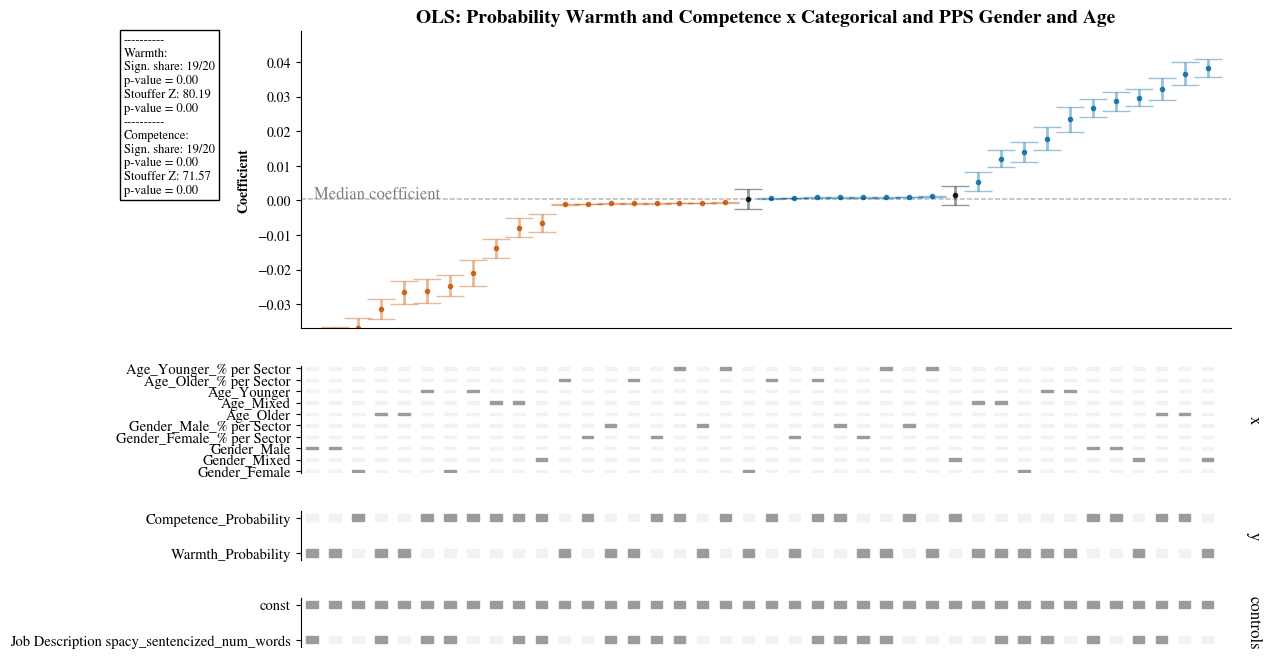

In [15]:
%%time
if len(dataframes) > 1:
    df_name = dataframes.keys()
else:
    df_name = list(dataframes.keys())[0]

model_name=list(sm_models.keys())[0]
dvs_type=list(dvs_for_analysis.keys())[0]
ivs_type=list(ivs_for_analysis.keys())[1]

sc, df_results, df_top_coeff_p, df_std_coef_dict, df_to_save, masks_dict, sc_stats_dict = run_sc(
    df_name=df_name,
    df=dataframes[df_name],
    model_name=model_name,
    model=sm_models[model_name],
    dvs_type=dvs_type,
    dvs_name=dvs_for_analysis[dvs_type][0],
    dvs_=dvs_for_analysis[dvs_type][1],
    ivs_type=ivs_type,
    ivs_name=ivs_for_analysis[ivs_type][0],
    ivs_=ivs_for_analysis[ivs_type][1],
)
